# 1. Import the package

In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import unicodedata
import nltk
import csv
import string
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
nltk.download('all')
import demoji

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

# 2. Connect to the file

In [ ]:
from google.colab import drive
drive.mount('/content/google_drive/')


Mounted at /content/google_drive/


# 3. Load the Dataset

In [ ]:
#load data
df = pd.read_csv('/content/google_drive/MyDrive/Colab Notebooks/en.csv')
print("whole number of dataset = {}".format(len(df)))

whole number of dataset = 10000


In [ ]:
df.head(10)

,ID,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,1.245140e+18,A glass of wine keeps the corona away- DRAKE. ...,1,0,0,0,0,0,0,0,0,0,1
1,1.245140e+18,Can Anyone tell me if you took the flu shot la...,0,0,0,0,1,0,0,0,0,1,0
2,1.245140e+18,Btw producers send me beats Im working on musi...,1,0,0,0,0,0,0,0,0,0,1
3,1.245140e+18,When someone you know.. apart of your family d...,0,0,0,0,0,1,0,0,0,0,0
4,1.245140e+18,"Dear soccer, I really miss you ,please come ba...",0,0,0,0,0,1,1,0,0,0,0
5,1.245140e+18,new home remedy to treat coronavirus! tested b...,1,0,0,0,0,0,0,1,0,0,1
6,1.245140e+18,When Xavier Wulf does an Attack on Titan tape ...,0,0,0,0,0,0,0,0,0,0,1
7,1.245140e+18,Mouthwash is hand san for your mouth and I don...,0,0,0,0,0,1,0,0,0,1,1
8,1.245140e+18,Yes all of them ! n France 1.000 Christians to...,0,0,0,0,0,0,1,0,1,1,0
9,1.245140e+18,Update I destroyed the tire honestly if I get ...,0,0,0,1,0,1,0,0,0,0,0


# EDA

## Labels

Text(0, 0.5, 'sentiment')

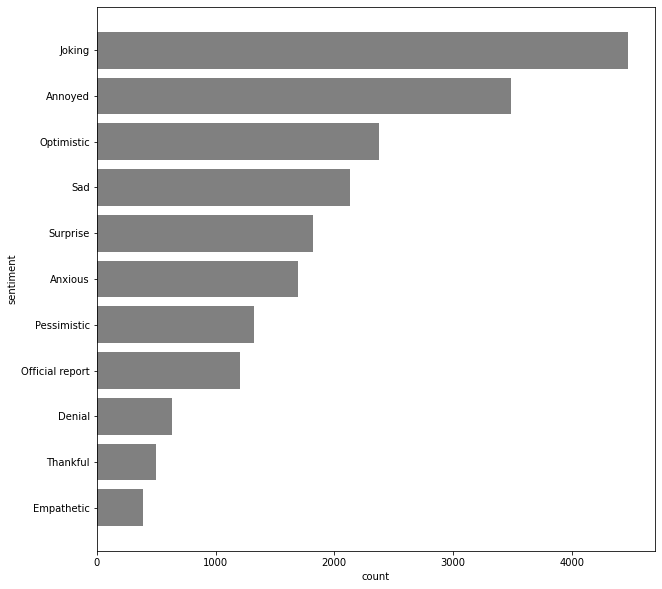

In [ ]:
#define a table for the labels
tables = [] #make a list
senti = list(df.columns[2:])
count = [sum(df[a]) for a in senti]


for b in range(len(senti)):
    tables.append((senti[b], count[b]))

tables = sorted(tables, key=lambda X:X[1], reverse=False)
senti_1 = []
count_1 = []

for t in tables:
  senti_1.append(t[0])
  count_1.append(t[1])

fig = plt.figure(figsize = (10,10))
plt.barh(senti_1, count_1, color='grey')

plt.xlabel('count')
plt.ylabel('sentiment')

Exploring the example for the sentiment in one tweet.

In [ ]:
example = np.random.randint(0, len(df))
print("Tweet : ", df.iloc[example]['Tweet'])
for t in senti:
    print(t, ": ", df.iloc[example][t])

Tweet :  When whole world is fighting against COVID19. India enforce new domicile law in Kashmir StayHomeStaySafe
Optimistic :  1
Thankful :  0
Empathetic :  0
Pessimistic :  0
Anxious :  0
Sad :  0
Annoyed :  1
Denial :  0
Official report :  0
Surprise :  0
Joking :  0


In [ ]:
sentilabel = df[senti]
sentilabel

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,0,1
9996,1,1,0,0,1,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,1,0
9998,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
sentilist = np.zeros((11,11))
sl = {'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8, 'Surprise' : 9, 'Joking' : 10}

for a in range(len(sentilabel)):
  l = sentilabel.iloc[a].tolist()
  for b in range(11):
    if l[b] ==1:
      sentilist[b][b] +=1
    for c in range(b+1, 11):
      if (l[b] ==1 ) and (l[c] == 1):
        sentilist[b][c] += int(1)
        sentilist[c][b] += int(1)

In [ ]:
sentival = pd.DataFrame(sentilist, columns = senti)
for l in sentival:
  sentival[l] = sentival[l].astype(int)
sentival

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,2373,235,171,226,246,291,379,72,156,387,982
1,235,498,28,15,41,29,67,14,70,98,92
2,171,28,389,18,50,71,41,7,7,24,63
3,226,15,18,1325,268,272,420,90,62,264,554
4,246,41,50,268,1695,360,452,95,138,357,510
5,291,29,71,272,360,2133,723,54,186,299,747
6,379,67,41,420,452,723,3492,261,122,536,1235
7,72,14,7,90,95,54,261,631,51,201,184
8,156,70,7,62,138,186,122,51,1207,284,95
9,387,98,24,264,357,299,536,201,284,1820,612


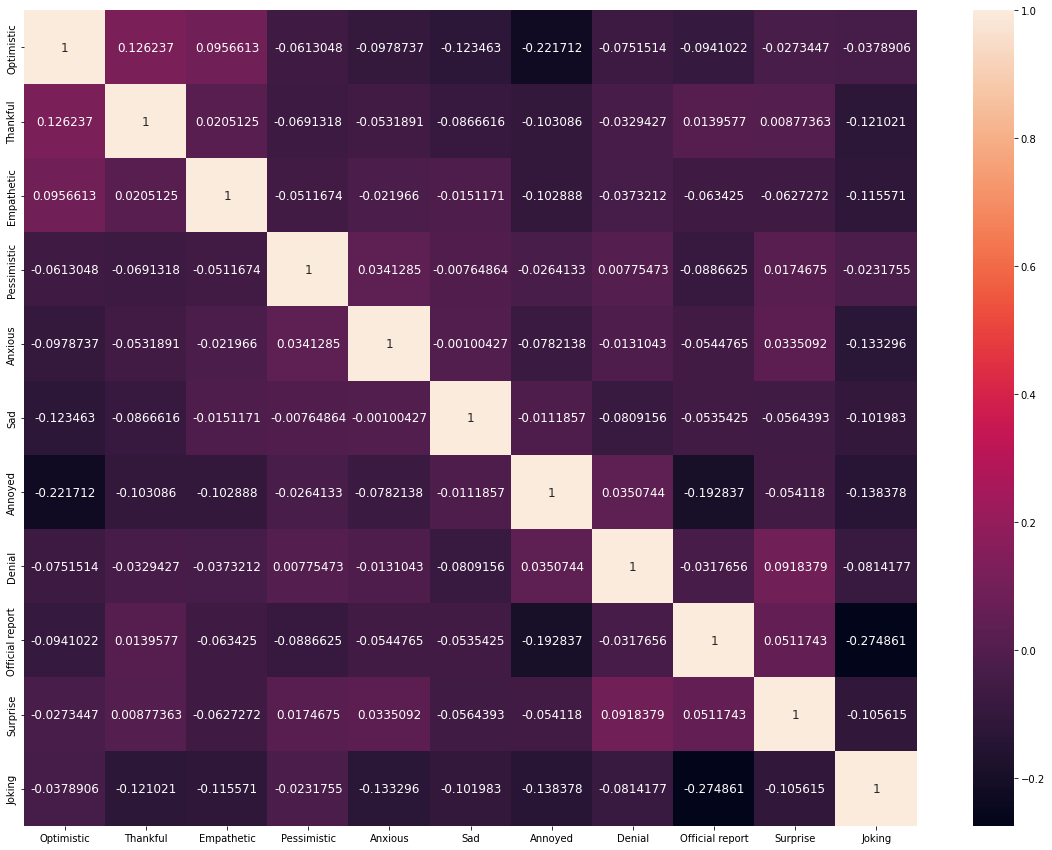

In [ ]:
fig = plt.figure(figsize = (20,15))
sns.heatmap(sentilabel.corr(), xticklabels = sentival.columns, yticklabels = sentival.columns, fmt = 'g', annot = True, annot_kws = {"size" : 12} )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


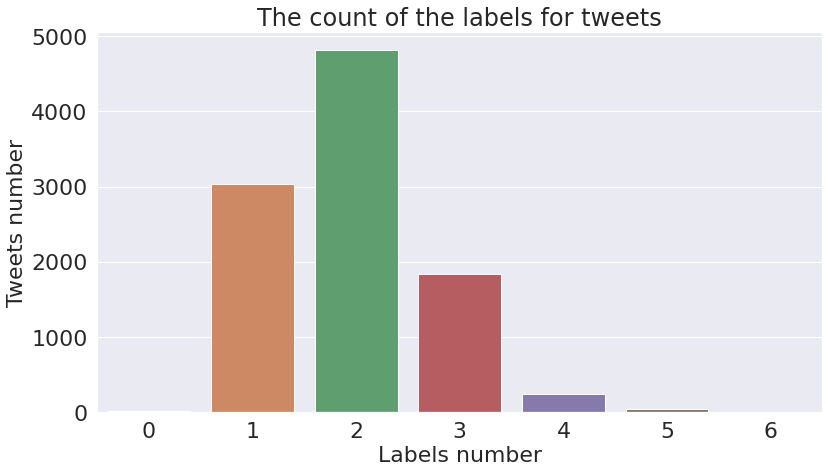

In [ ]:
df['sumsentilabels'] = df['Optimistic'] + df['Thankful'] + df['Empathetic'] + df['Pessimistic'] + df['Anxious'] + df['Sad'] + df['Annoyed'] + \
                        df['Official report'] + df['Surprise'] + df['Joking']
sumrow = df['sumsentilabels']
countlabel = sumrow.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (13,7))

ax = sns.barplot(countlabel.index, countlabel.values, orient='v')

plt.title("The count of the labels for tweets")
plt.ylabel('Tweets number', fontsize = 22)
plt.xlabel('Labels number', fontsize = 22)

r = ax.patches
l = countlabel.values
for r, l in zip(r, l):
    height = r.get_height()

plt.show()


In [ ]:
countlabel

2    4818
1    3034
3    1842
4     244
5      46
0      15
6       1
Name: sumsentilabels, dtype: int64

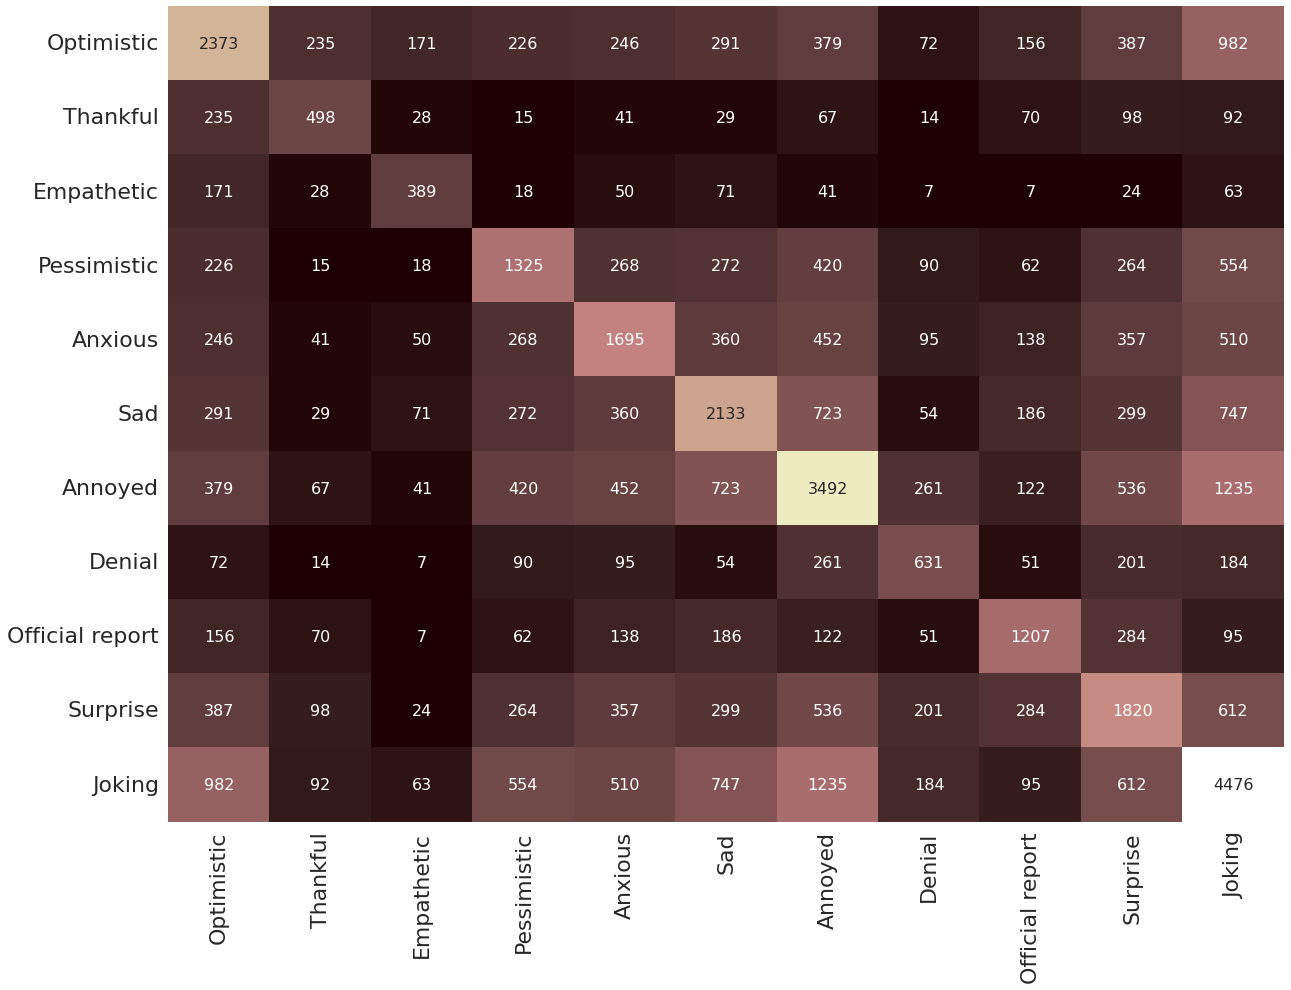

In [ ]:
fig = plt.figure(figsize = (20,15))
sns.set(font_scale = 2)
sns.heatmap(sentival, annot = True, cmap = 'pink', xticklabels = sentival.columns, yticklabels = sentival.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

# Wordcloud

optimistic

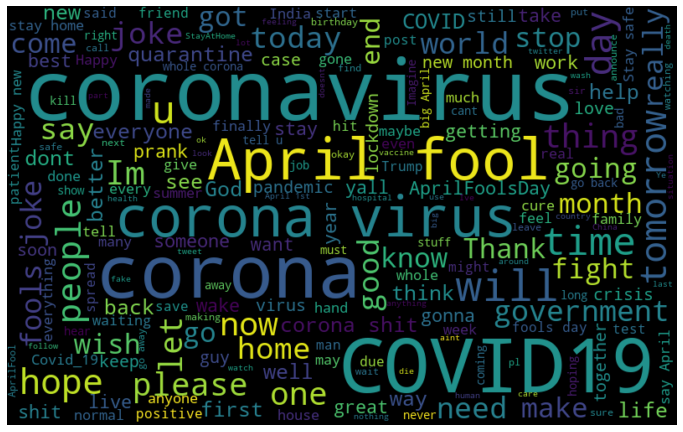

In [ ]:
optimisticWords = " ".join([word for word in df['Tweet'][df['Optimistic'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(optimisticWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

thankful

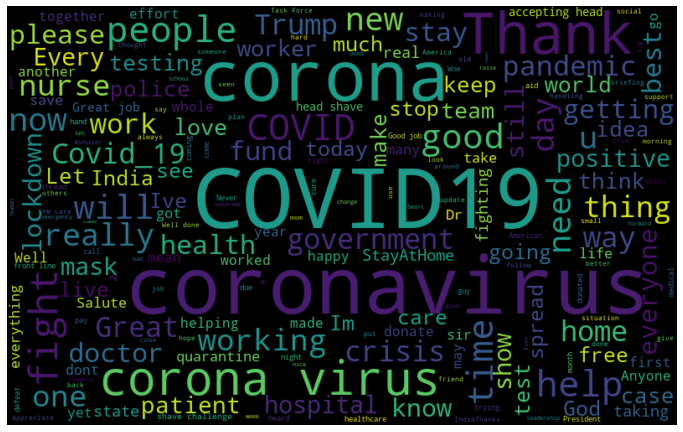

In [ ]:
thankfulWords = " ".join([word for word in df['Tweet'][df['Thankful'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(thankfulWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

empathetic

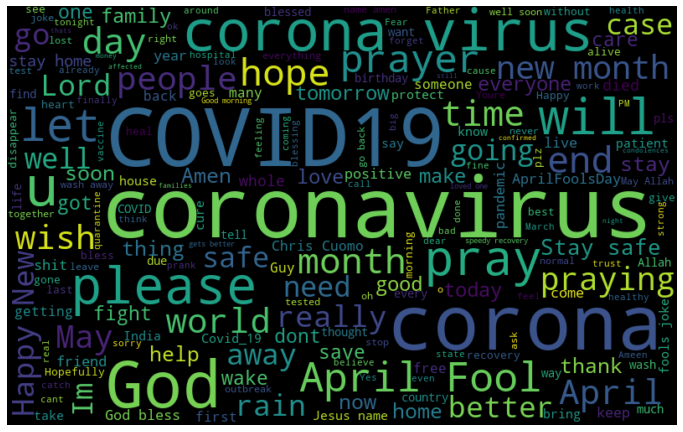

In [ ]:
empatheticWords = " ".join([word for word in df['Tweet'][df['Empathetic'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(empatheticWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

anxious

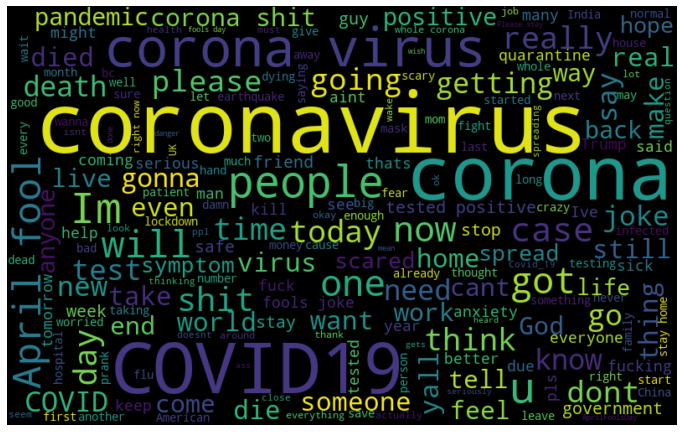

In [ ]:
anxiousWords = " ".join([word for word in df['Tweet'][df['Anxious'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(anxiousWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

sad

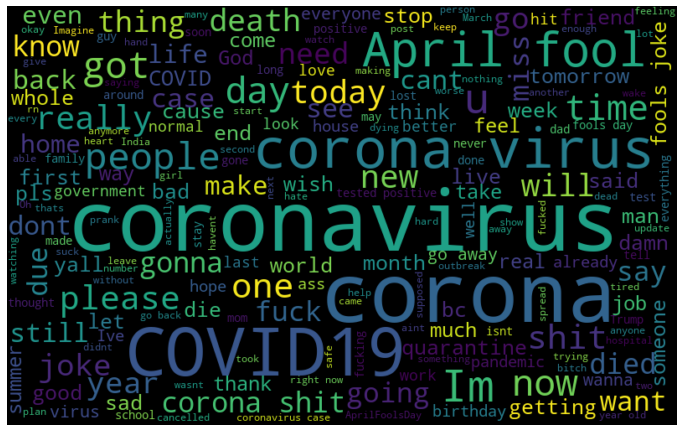

In [ ]:
SadWords = " ".join([word for word in df['Tweet'][df['Sad'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(SadWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Official Report

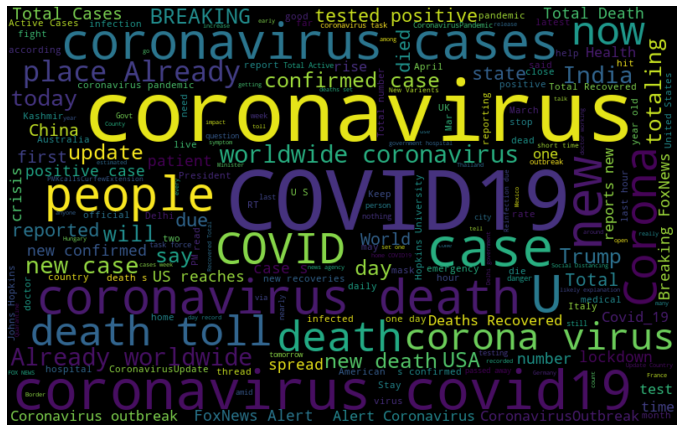

In [ ]:
ORWords = " ".join([word for word in df['Tweet'][df['Official report'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(ORWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

joking

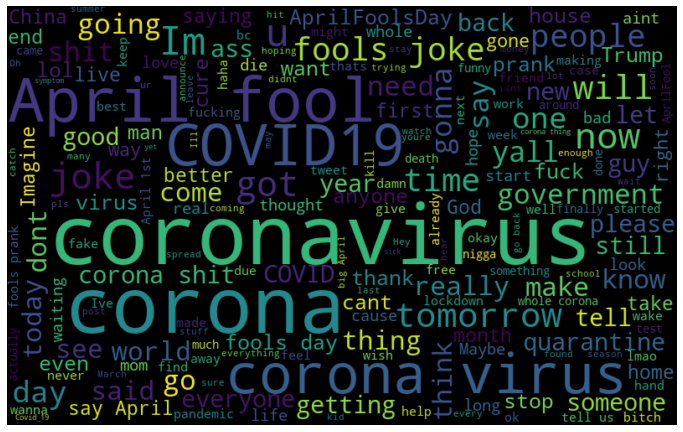

In [ ]:
JokeWords = " ".join([word for word in df['Tweet'][df['Joking'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(JokeWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# unigram, bigram
Cleaning followed by Unigram and Bigram analysis

In [ ]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [ ]:
words = clean(''.join(str(df['Tweet'].tolist())))

In [ ]:
words[:20]

['glass',
 'wine',
 'keep',
 'corona',
 'away',
 'drake',
 'se',
 'diga',
 'm',
 'cheer',
 'anyone',
 'tell',
 'took',
 'flu',
 'shot',
 'last',
 'year',
 'give',
 'positive',
 'result']

## N-gram analysis 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

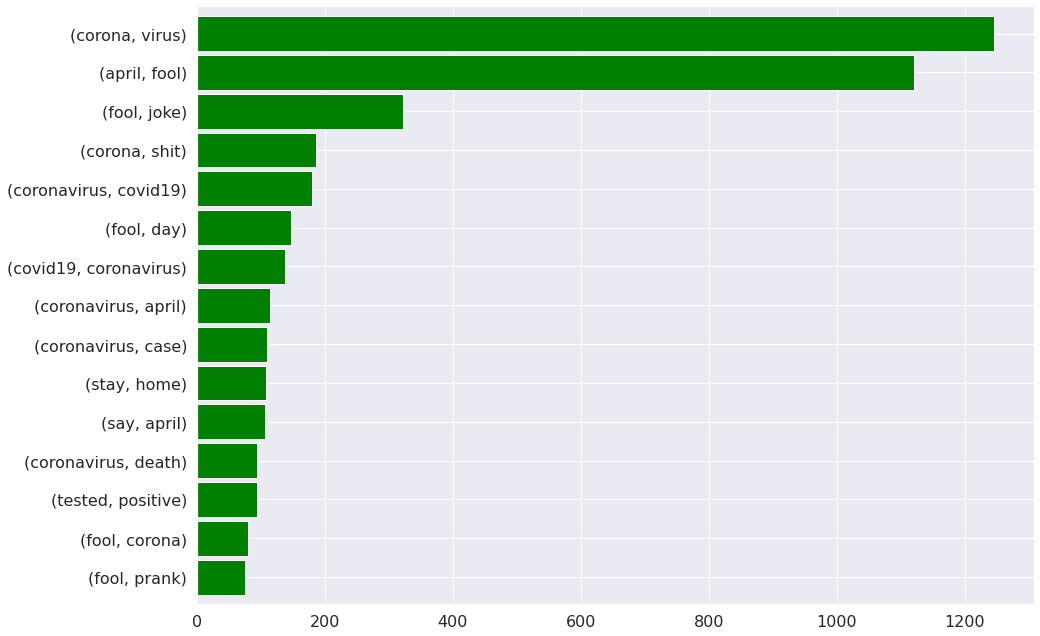

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'green', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

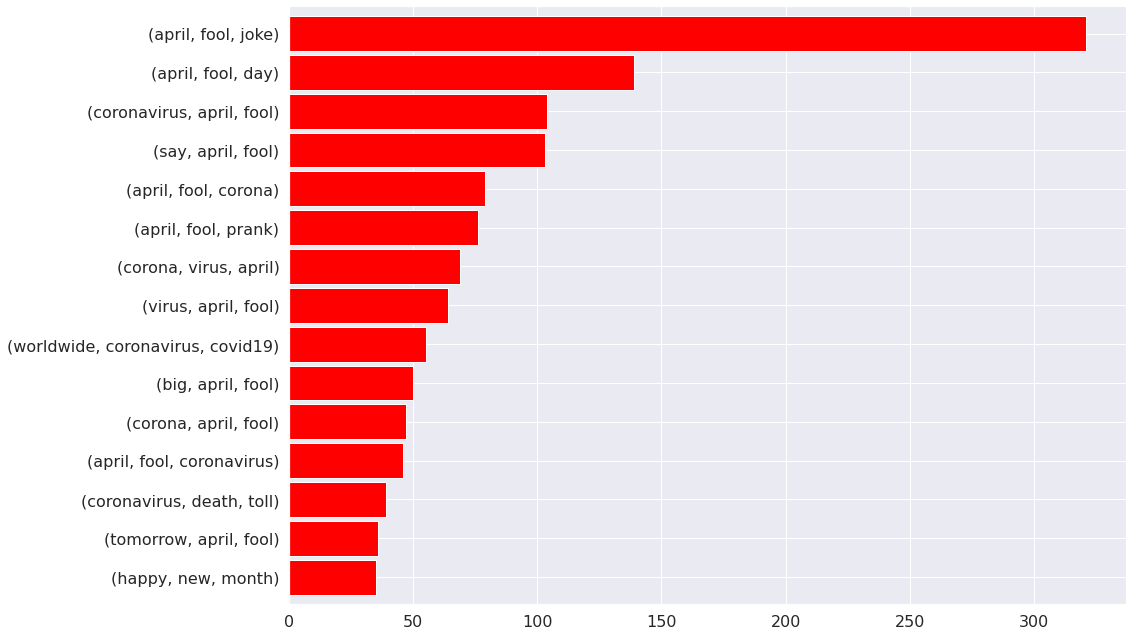

In [ ]:
trigrams_series.sort_values().plot.barh(color = 'red', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)